Question : Emotion Detection in Twitter Data using NLP Techniques

 - Dataset : dataset of Twitter posts (tweets) that are labelled with specific emotions.
 - Objective :  to develop a model that can accurately classify these tweets into different emotion categories such as joy, sadness, anger, fear, surprise etc

In [4]:
#necessary imports
import pandas as pd
import nltk

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
#reading text
df = pd.read_csv("/content/tweet_emotions.csv")

In [80]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [81]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


In [127]:
df.isna().sum()

,0
tweet_id,0
sentiment,0
content,0
label,0
new_cleaned_text,0


 ## Steps to do

 ● FeatureExtraction

 ● ModelBuilding and Evaluation (Create different models, including deep learning models)

 ● Evaluate the Model's Performance

### Cleaning the text

In [11]:
import re

#cleaning the text
def clean_text(text):
    text = text.lower()
    # remove links we dont need those too
    text = re.sub(r'http\S+|www\S+', '', text)
    # remove @mentions , doesnt contain anything useful
    text = re.sub(r'@\w+', '', text)
    # remove hashtag symbol
    text = re.sub(r'#', '', text)
    # remove punctuation/numbers
    text = re.sub(r'[^a-z\s]', '', text)

    return text

#Doing using tfidf with logistic regression

tfidf is term frequency inverse document frequency

In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#spliting the text into tokens and lemmatizing
#lemmatizing is different from stemming, in where the words are cut at each ends, where lemmatizing more measure s are taken to get into the
#dictionary base form such as checking if its a verb, adjective etc..

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [129]:
cleaned_text = df['content'].apply(clean_text)
df['cleaned_text'] = cleaned_text.apply(tokenize_and_lemmatize)

In [130]:
df['cleaned_text'].head()

,cleaned_text
0,know listenin bad habit earlier started freaki...
1,layin n bed headache ughhhhwaitin call
2,funeral ceremonygloomy friday
3,want hang friend soon
4,want trade someone houston ticket one


# Feature extraction

In [132]:
#vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])


In [16]:
#creates sparse metrix to save memeory
vectorized = X.toarray()

In [17]:
vectorized.shape

(40000, 31732)

In [18]:
vectorizer.get_feature_names_out()[:20]

array(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaaaaaa',
       'aaaaaaaaaahhhhhhhh', 'aaaaaaaaaamazing', 'aaaaaaaafternoon',
       'aaaaaaaahhhhhhhh', 'aaaaaah', 'aaaaaahhhhhhhh', 'aaaaaalcohol',
       'aaaaahhhh', 'aaaaall', 'aaaaandnothin', 'aaaaaoouoouoouu',
       'aaaaarrrrggghhh', 'aaaaaw'], dtype=object)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [24]:
# Target column - sentiment
y = df['sentiment']

# Spliting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
#fitting
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)

In [30]:
#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3495
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        22
     boredom       0.00      0.00      0.00        36
       empty       0.00      0.00      0.00       165
  enthusiasm       0.00      0.00      0.00       152
         fun       0.29      0.02      0.04       355
   happiness       0.34      0.32      0.33      1042
        hate       0.53      0.11      0.19       265
        love       0.54      0.40      0.46       768
     neutral       0.32      0.60      0.41      1728
      relief       0.27      0.03      0.05       305
     sadness       0.36      0.23      0.28      1033
    surprise       0.32      0.03      0.05       437
       worry       0.35      0.49      0.41      1692

    accuracy                           0.35      8000
   macro avg       0.25      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### accuracy is pretty low when using tfidf with logistic regression
### next appproach -

#Using RNN with pretrained embedding

In [61]:
import tensorflow

In [86]:
#cleaning text with my predefined function
df['new_cleaned_text']= df['content'].apply(clean_text)

In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#tokenzing the words, tokenze - turning words into integers

i have specified 10,000 as the vocab size , its standard size in all dataset , thats why i picked, it covers almost 90 % of tokens


In [106]:

vocab_size = 10000
#tokenizing based on vocab size and oov_token, oov_token is for dealing with wrds out of vocab

#initializing the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['new_cleaned_text'])

#tokenizing - each word is replaced by the token from the vocab
sequences = tokenizer.texts_to_sequences(df['new_cleaned_text'])

In [115]:
lengths = [len(seq) for seq in sequences]
print("Max:", max(lengths))

Max: 32


In [ ]:

#all sentences have varying length, so to make all to an even length we use padding, since we found the amx length
# i used that as padding here

max_length = 30
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [116]:
label_counts = df['sentiment'].value_counts()

# Print the counts
print("Counts of each sentiment label:")
print(label_counts)

# You can also get the total number of unique classes
n_classes = len(label_counts)
print("\nNumber of classes:", n_classes)

Counts of each sentiment label:
sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

Number of classes: 13


In [117]:
### Encoding the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])


In [118]:
### Train-test split

#we split the data, padded sequence is our x data, and y being the label or sentiment. stratify= df['label'] is to ensure the test data contains
#equal distribution of y data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


In [109]:
#using pretrained embedding, use dimension size 25
import gensim.downloader as api
embedding_model = api.load("glove-twitter-25")
embedding_dim = 25

In [110]:
#build an embedding matrix, if embedding is in tokenizer we use it else we use a random vector
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        if word in embedding_model:
            embedding_matrix[index] = embedding_model[word]
        else:
            embedding_matrix[index] = np.random.normal(scale=0.1, size=(embedding_dim,))


#### lstm stands for long short term memory , a type of RNN.
since rnn has short term memeory so  we use lstm

In [111]:
### Building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(
    #input dim is our vocab size
    input_dim=vocab_size,
    #output is embedding_dim which we specified earlier
    output_dim=embedding_dim,
    #here we are giving our model a headtsrat with pretarained embeddings, so we get more accurate results faster
    weights=[embedding_matrix],
    input_length=max_length,
    #we also set it trainable so it can adjust to our dataset
    trainable=True
))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))   # multi-class, so we use softmax

model.compile(loss='sparse_categorical_crossentropy', # for multiclass labeled output we use sparse....
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,000 (976.56 KB)

 Trainable params: 250,000 (976.56 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
### Callbacks
#i stored the best model in case we loose any good ones
checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


### Training
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/20
798/800 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2281 - loss: 2.2013
Epoch 1: val_accuracy improved from -inf to 0.26234, saving model to best_lstm_model.keras
800/800 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.2282 - loss: 2.2011 - val_accuracy: 0.2623 - val_loss: 2.0821
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3129 - loss: 1.9939
Epoch 2: val_accuracy improved from 0.26234 to 0.34078, saving model to best_lstm_model.keras
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.3130 - loss: 1.9939 - val_accuracy: 0.3408 - val_loss: 1.9246
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3574 - loss: 1.8823
Epoch 3: val_accuracy improved from 0.34078 to 0.34453, saving model to best_lstm_model.keras
800/800 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3574 - loss: 1.8823 - val_accuracy: 0.3445 - val_loss: 1.9123
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3777 - loss: 1.8211
Epoch 4: val_acc

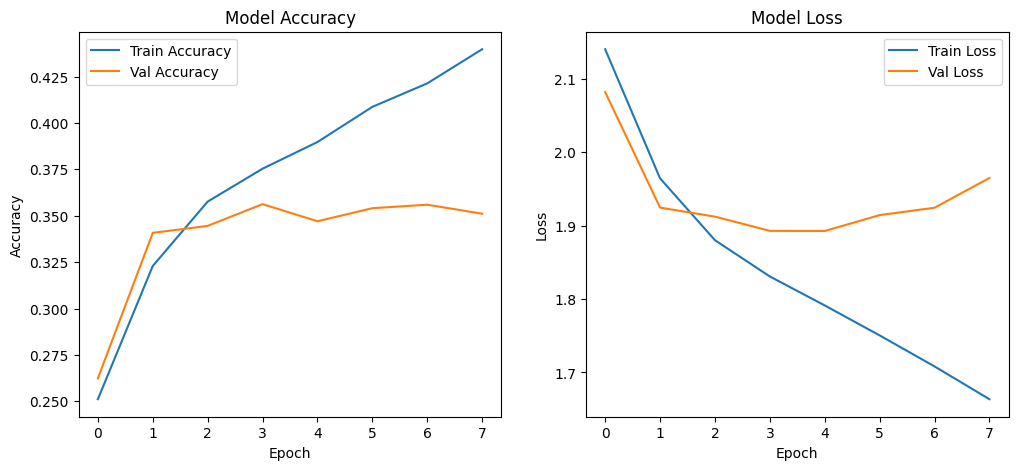

In [114]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [123]:
sample_text = "I feel so tired"

# clean the text
cleaned = clean_text(sample_text)

# tokenize & pad
seq = tokenizer.texts_to_sequences([cleaned])
padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')

In [124]:
pred = model.predict(padded)
print("Raw prediction:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Raw prediction: [[0.00550801 0.00716377 0.02220086 0.00624592 0.00542047 0.00571915
  0.0964679  0.00493088 0.10693912 0.00904669 0.32287094 0.03592841
  0.37155792]]


In [125]:
pred_class = np.argmax(pred, axis=1)[0]   # best class index
print("Predicted class index:", pred_class)


Predicted class index: 12


In [126]:
print(label_encoder.classes_[pred_class])

worry


# Conclusion


tfidf with logistic regression didnt work well, giving a lower accuracy rate. Its a linear model, 's a linear , doesn't capture the semantic meaning or sequence of words

moved to rnn with pretrained embedding worked well, RNN is a deep learning model designed to understand the context and sequence of text.

Still there is room for improvement